In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import spacy
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [3]:
tweets=pd.read_csv('Elon_musk.csv',encoding='latin-1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
tweets[tweets.duplicated()]

,Unnamed: 0,Text


In [5]:
tweets.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [6]:
tweets = tweets.drop(columns=['Unnamed: 0'],axis=1)

In [7]:
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
tweets.dtypes

Text    object
dtype: object

In [9]:
tweets = tweets['Text']
tweets

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [10]:
twets = [x.strip() for x in tweets]
tweets

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [11]:
# remove empty strings, because they are considered in Python as False
tweets = [x for x in tweets if x]
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [12]:
#Joining the list into one text
text = ' '.join(tweets)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [13]:
!python -m spacy download en

2023-11-25 11:54:14.642686: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 11:54:14.642744: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 11:54:14.642776: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 11:54:15.871290: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.4 MB/s eta 0:00:00
✔ Download and installation succe

In [14]:
#removing Punctuations
import string

no_punc_text = text.translate(str.maketrans('\x92',"'", string.punctuation))
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [15]:
!pip install nltk

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
#Tokenization
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',

In [18]:
len(text_tokens)

21373

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
no_stop_tokens

['kunalb11',
 'I',
 "'m",
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'httpstco3rWE9uHSTS',
 'geoffkeighley',
 'UnrealEngine',
 'It',
 "'s",
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'JoshManMode',
 'He',
 'definitely',
 'issues',


In [22]:
len(no_stop_tokens)

15946

In [23]:
#Making every words into lower case
lower_case_words = [x.lower() for x in no_stop_tokens]
lower_case_words

['kunalb11',
 'i',
 "'m",
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'httpstco9wfkmyu2oj',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 'owensparks',
 'flcnhvy',
 'anonyx10',
 'haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'indeed',
 'tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'givedirectly',
 'just',
 'sent',
 'just',
 'agree',
 'clubhouse',
 'kanyewest',
 'httpstco3rwe9uhsts',
 'geoffkeighley',
 'unrealengine',
 'it',
 "'s",
 'getting',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'joshmanmode',
 'he',
 'definitely',
 'issues',


In [24]:
#Stemmatizing
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_case_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [25]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [26]:
doc = nlp(' '.join(no_stop_tokens))
doc

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation The entertaining outcome likely GiveDirectly Just sent Just agree Clubhouse kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It 's getting real Bought Dogecoin lil X toddler hodler JoshManMode He definitely issues sentencing seems bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy U0001F923U0001F923 This true power haha httpstcoFc9uhQSd7O freewalletorg Any crypto wallet wo n't give private keys avoided costs freewalletorg Your app sucks RT SpaceX NASA selected Falcon Heavy launch first two elements lunar Gateway tog

In [27]:
lemmas = [x.lemma_ for x in doc]
lemmas

['kunalb11',
 'I',
 "'",
 'm',
 'alien',
 'IDAACarmack',
 'Ray',
 'trace',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'have',
 'try',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'Doge',
 'underestimate',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'httpstco9wfkmyu2oj',
 'Frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'just',
 'send',
 'just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'httpstco3rWE9uHSTS',
 'geoffkeighley',
 'UnrealEngine',
 'it',
 'be',
 'get',
 'real',
 'buy',
 'Dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'JoshManMode',
 'he',
 'definitely',
 'issue',
 'senten

Feature Extraction

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
X = vector.fit_transform(lemmas)

In [29]:
vector.vocabulary_

{'kunalb11': 2695,
 'alien': 231,
 'idaacarmack': 2433,
 'ray': 3615,
 'trace': 4493,
 'cyberpunk': 959,
 'hdr': 1670,
 'nextlevel': 3150,
 'have': 1665,
 'try': 4528,
 'joerogan': 2615,
 'spotify': 4111,
 'great': 1604,
 'interview': 2544,
 'gtera27': 1623,
 'doge': 1110,
 'underestimate': 4661,
 'teslacn': 4338,
 'congratulations': 855,
 'tesla': 4332,
 'china': 739,
 'amazing': 257,
 'execution': 1320,
 'last': 2715,
 'year': 4932,
 'now': 3190,
 'next': 3149,
 'even': 1292,
 'happy': 1652,
 'new': 3146,
 'ox': 3307,
 'httpstco9wfkmyu2oj': 1860,
 'frodo': 1489,
 'underdoge': 4660,
 'all': 234,
 'thought': 4417,
 'would': 4907,
 'fail': 1356,
 'himself': 1716,
 'httpstcozgxjfdzzrm': 2393,
 'owensparks': 3304,
 'flcnhvy': 1430,
 'anonyx10': 286,
 'haha': 1637,
 'thanks': 4376,
 'indeed': 2482,
 'tweets': 4551,
 'definitely': 1014,
 'represent': 3699,
 'realworld': 3641,
 'time': 4436,
 'allocation': 236,
 'the': 4383,
 'entertaining': 1248,
 'outcome': 3284,
 'likely': 2776,
 'givedir

In [30]:
pd.DataFrame.from_records([vector.vocabulary_])

,kunalb11,alien,idaacarmack,ray,trace,cyberpunk,hdr,nextlevel,have,try,...,dire,priority,surreal,propaganda,social,httpstcowjrzibkh1h,click,samwise,gamgee,altho
0,2695,231,2433,3615,4493,959,1670,3150,1665,4528,...,1075,3504,4248,3540,4031,2325,773,3816,1525,247


In [31]:
pd.DataFrame.from_records([vector.vocabulary_]).T

,0
kunalb11,2695
alien,231
idaacarmack,2433
ray,3615
trace,4493
...,...
httpstcowjrzibkh1h,2325
click,773
samwise,3816
gamgee,1525


In [32]:
pd.DataFrame.from_records([vector.vocabulary_]).T.sort_values(0, ascending=False).head(50)

,0
ðogecoin,4964
zzcool,4963
zwiebelbach,4962
zubinanary,4961
zshauladventure,4960
zone,4959
zon,4958
zogfotpik,4957
zip2,4956
zikryzamir,4955


In [33]:
vector.get_feature_names_out()

array(['005', '10', '100', ..., 'zwiebelbach', 'zzcool', 'ðogecoin'],
      dtype=object)

In [34]:
X.toarray().shape

(16023, 4965)

Bigram and Trigrams

In [35]:
vectorizer_ngram_range = CountVectorizer(analyzer = 'word', ngram_range = (1,4), max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(tweets)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [36]:
vectorizer_ngram_range.get_feature_names_out()

array(['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp',
       'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can',
       'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first',
       'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have',
       'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in',
       'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like',
       'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa',
       'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the',
       'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably',
       'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some',
       'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv',
       'teslarati', 'than', 'that', 'the', 'there', 'they', 'this',
       'this is', 'to', 'too', 'true', 'was', 'we', 'what',
       'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah',
       'year', 'yes', 'yo

In [37]:
bow_matrix_ngram.toarray().shape

(1999, 100)

Fidf vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm=None,
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(tweets)

In [39]:
vectorizer_n_gram_max_features.get_feature_names_out()

array(['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp',
       'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can',
       'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first',
       'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have',
       'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in',
       'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like',
       'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa',
       'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the',
       'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably',
       'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some',
       'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv',
       'teslarati', 'than', 'that', 'the', 'there', 'they', 'this',
       'this is', 'to', 'too', 'true', 'was', 'we', 'what',
       'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah',
       'year', 'yes', 'yo

In [40]:
tf_idf_matrix_n_gram_max_features.toarray().shape

(1999, 100)

Word Cloud visualization

In [41]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(50,30))
  plt.imshow(wordcloud)
  plt.axis('off')

In [42]:
wordcloud = WordCloud(width = 3500,
                      height = 2500,
                      background_color= 'black',
                      max_words=120,
                      colormap='Set2').generate(text)

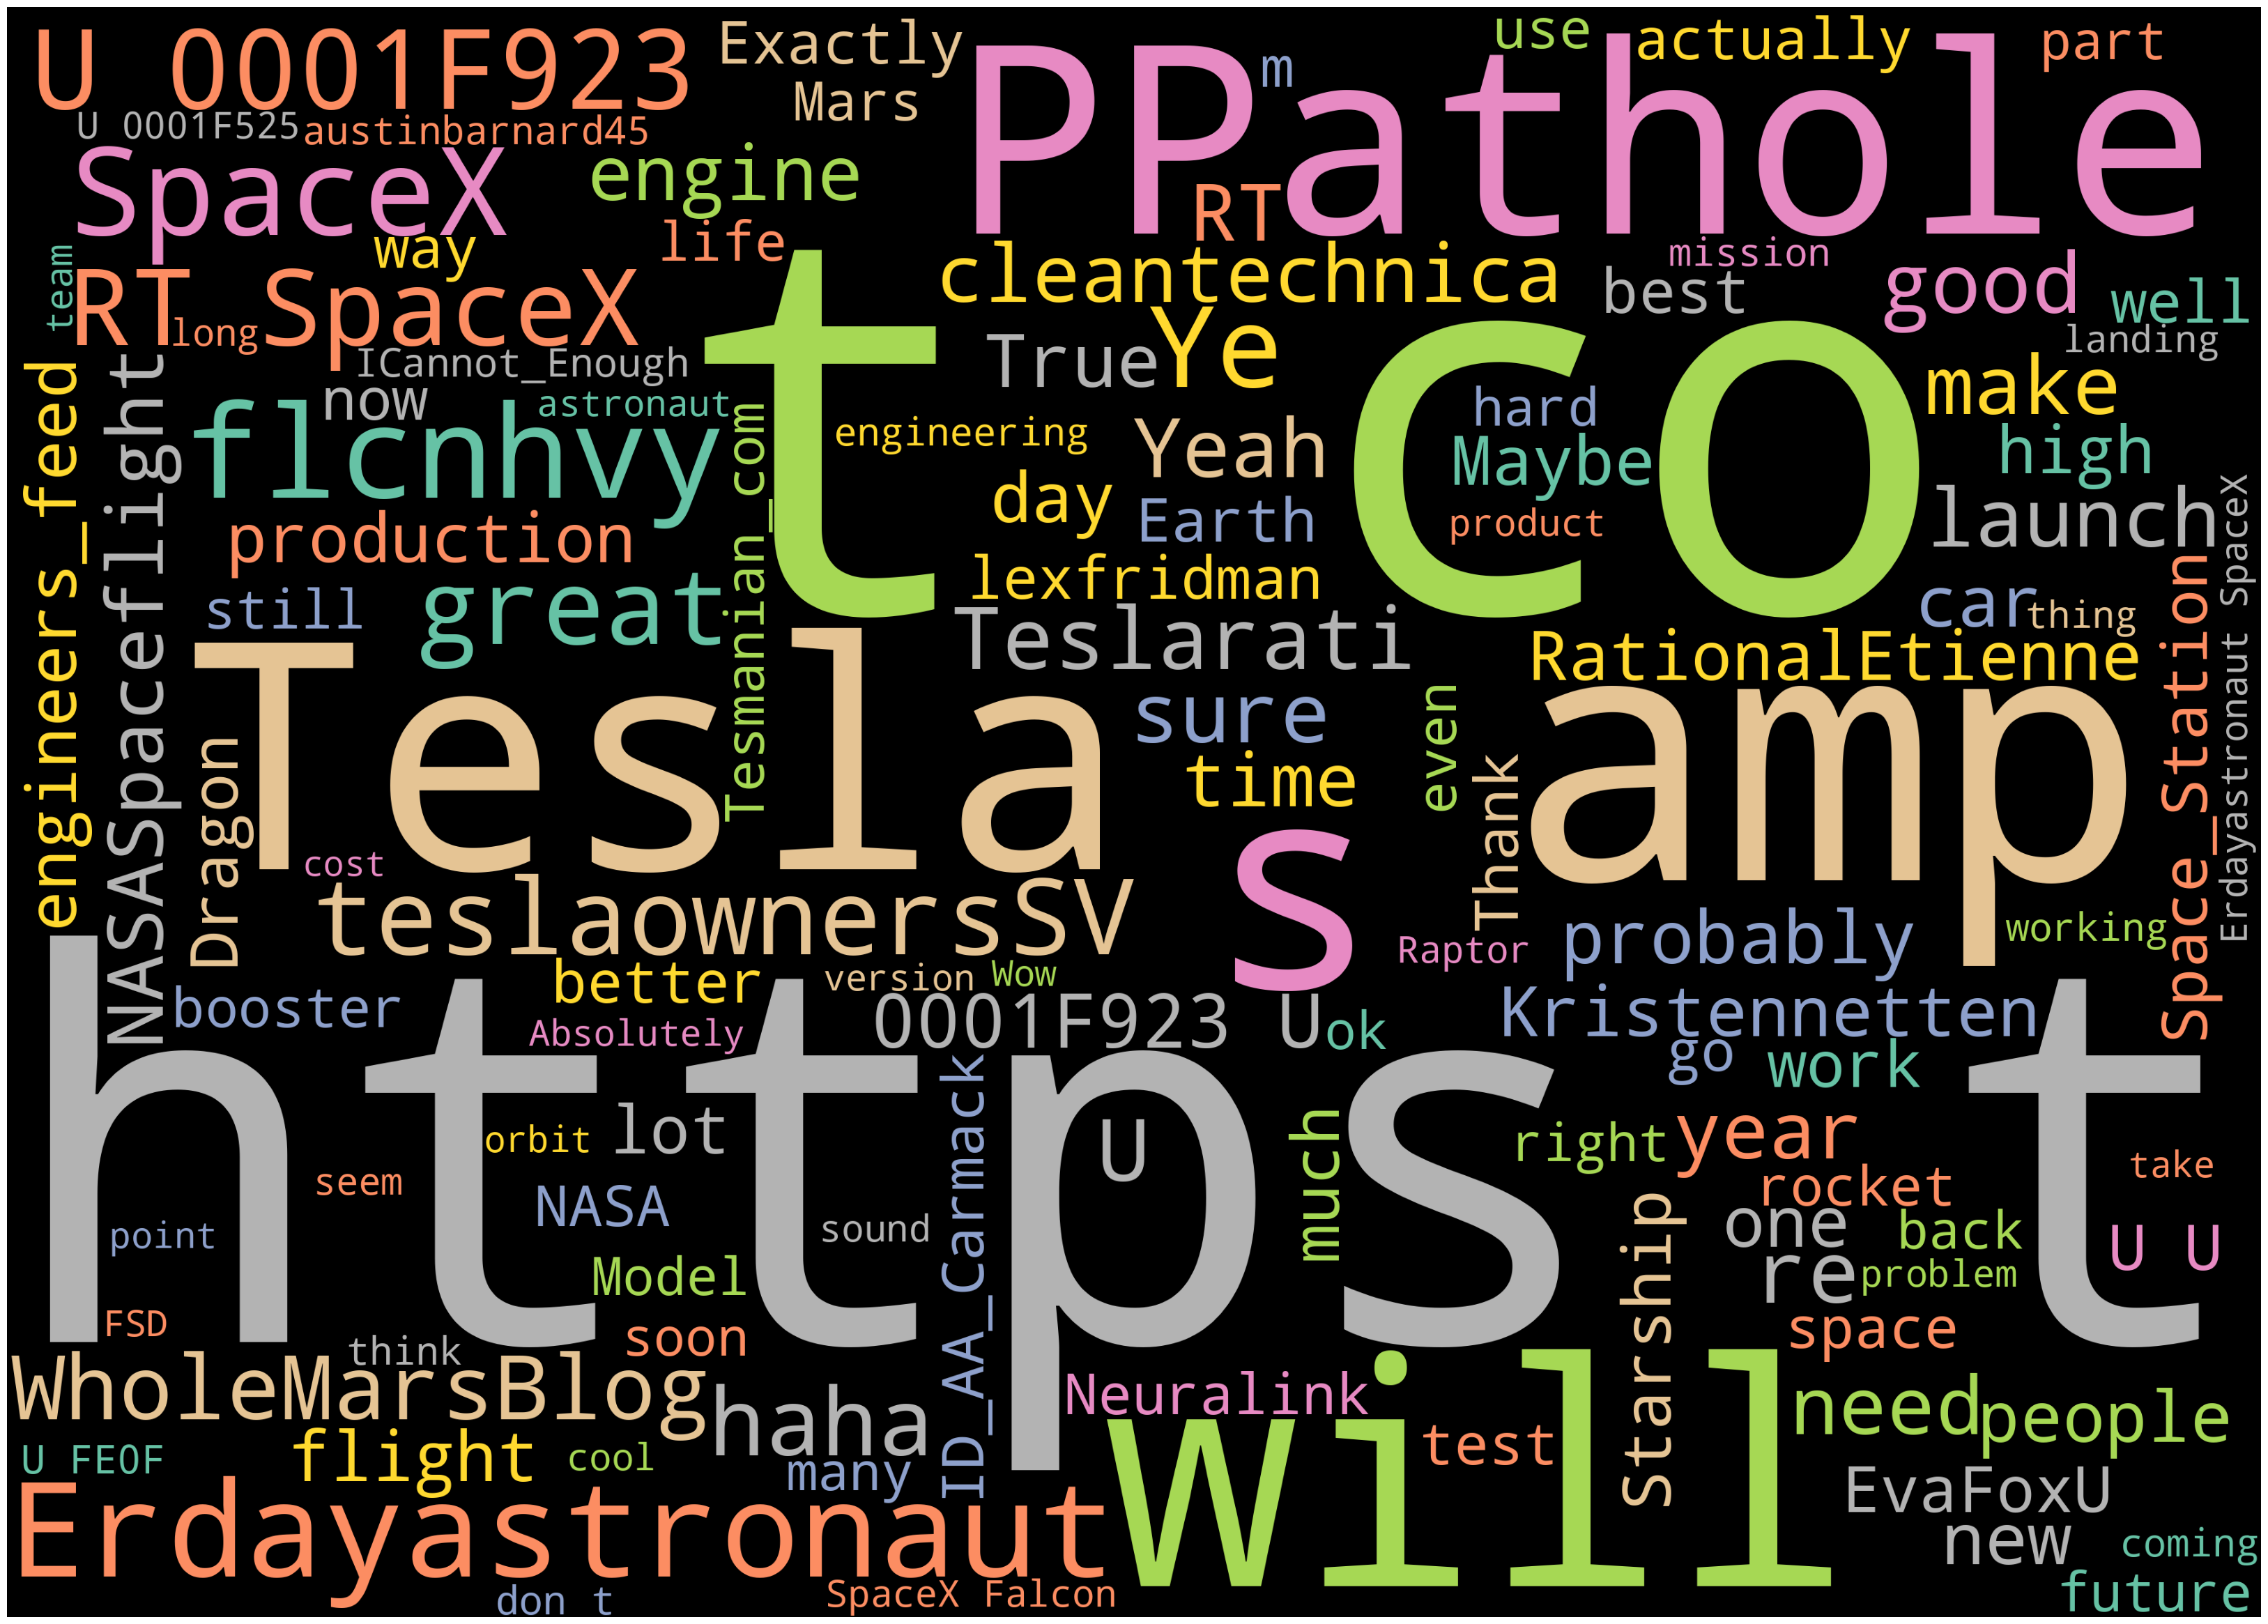

In [43]:
plot_cloud(wordcloud)

In [44]:
musk2 = pd.read_csv('Elon_musk.csv',encoding='ISO-8859-1')
musk2

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [45]:
musk2 = musk2['Text']

In [46]:
musk = [x.strip() for x in musk2]
musk2 = [x for x in musk2 if x]
musk2

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [47]:
musk2[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [48]:
block_one = musk2[4]
doc_block = nlp(block_one)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [49]:
for token in doc_block[:]:
    print(token, token.pos_)

@teslacn PROPN
Congratulations PROPN
Tesla PROPN
China PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
Now ADV
on ADP
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT


In [50]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
nouns_verbs

['execution', 'year']

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X.shape

(2, 2)

In [52]:
X.toarray()

array([[1, 0],
       [0, 1]])

In [53]:
cv.get_feature_names_out()

array(['execution', 'year'], dtype=object)

In [54]:
matrix_df = pd.DataFrame(X.toarray(),columns = cv.get_feature_names_out())
matrix_df

,execution,year
0,1,0
1,0,1


In [55]:
sum_words = X.sum(axis=0)
sum_words

matrix([[1, 1]])

In [56]:
type(sum_words)

numpy.matrix

In [57]:
cv.vocabulary_

{'execution': 0, 'year': 1}

In [58]:
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,execution,1
1,year,1


visualization

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

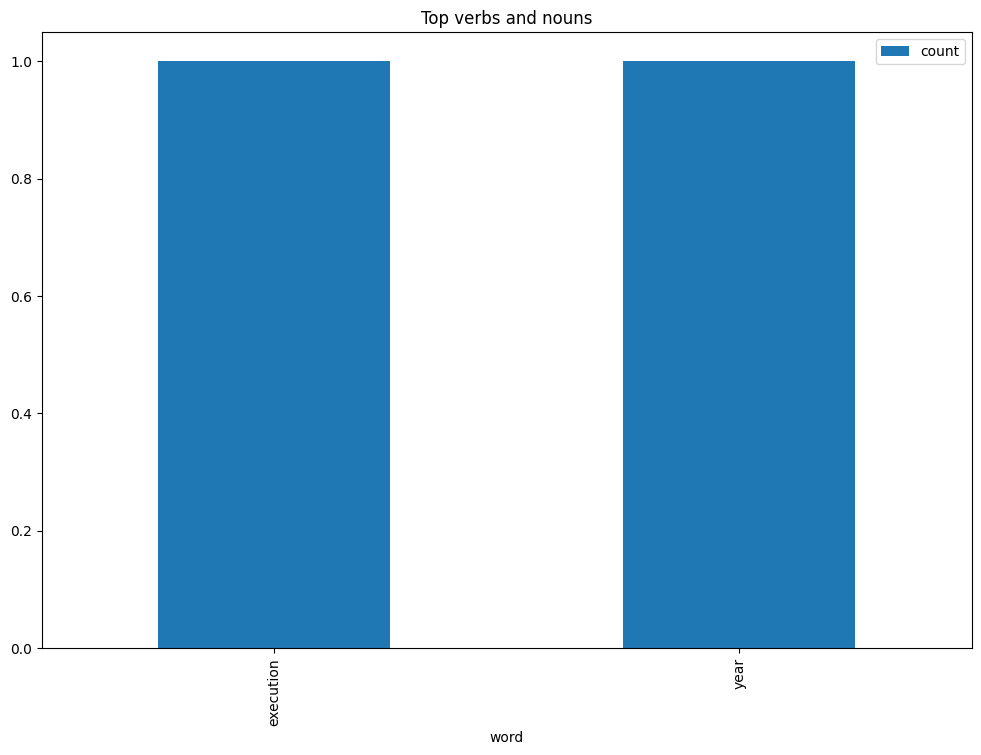

In [59]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df.plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

Emotion mining

In [60]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn.csv


In [61]:
affin_data = pd.read_csv('Afinn.csv',encoding='ISO-8859-1')
affin_data

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [62]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(musk2))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [63]:
sentences_df = pd.DataFrame(sentences, columns=['sentence'])
sentences_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [64]:
affinity_scores = affin_data.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [65]:
nlp = spacy.load('en_core_web_sm')

In [66]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
  sent_score = 0
  if text:
    sentence = nlp(text)

    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_, 0)

    return sent_score

In [67]:
calculate_sentiment(text = 'Awesome, Great')

7

In [68]:
calculate_sentiment(text= 'notbad, worst')

-3

In [69]:
calculate_sentiment(text= 'most unlikely, i hate it')

-3

In [70]:
sentences_df['sentiment_value'] = sentences_df['sentence'].apply(calculate_sentiment)

In [71]:
sentences_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0
923,"It may never pay out, as the stock cant b ht...",-4
924,Details Aug 28.,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [72]:
sentences_df['word_count'] = sentences_df['sentence'].str.split().apply(len)
sentences_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11
923,"It may never pay out, as the stock cant b ht...",-4,31
924,Details Aug 28.,0,3
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [73]:
sentences_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
226,"@PPathole @karpathy For a second there, I thou...",11,69
161,@harsimranbansal @heydave7 It will most likely...,11,93
820,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
186,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
648,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
588,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
722,We just havent observed the https://t.co/mez...,17,72


In [74]:
sentences_df.sort_values(by='sentiment_value').head(10)

,sentence,sentiment_value,word_count
840,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
923,"It may never pay out, as the stock cant b ht...",-4,31
683,"Occasional flights from land are ok, but frequ...",-4,39
614,"Then static fire, checkouts, static fire, fly ...",-4,12
23,https://t.co/UEEocOfcTb The people have spoken...,-3,37
235,@RationalEtienne @MarcusHouseGame Not yet @Sta...,-3,8
222,External https://t.co/csIZk6sEVu @bcart03 @ne...,-3,31
221,@RGVaerialphotos It will be real soon @MarcusH...,-3,18


In [75]:
sentences_df[sentences_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [76]:
sentences_df['index'] = range(0,len(sentences_df))

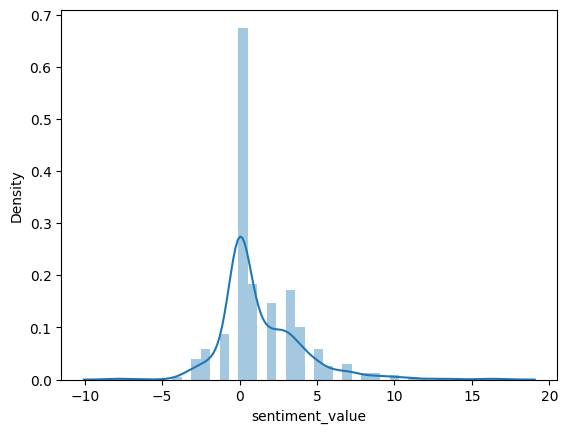

In [77]:
import seaborn as sns
sns.distplot(sentences_df['sentiment_value'])
plt.show()

<Axes: xlabel='index', ylabel='sentiment_value'>

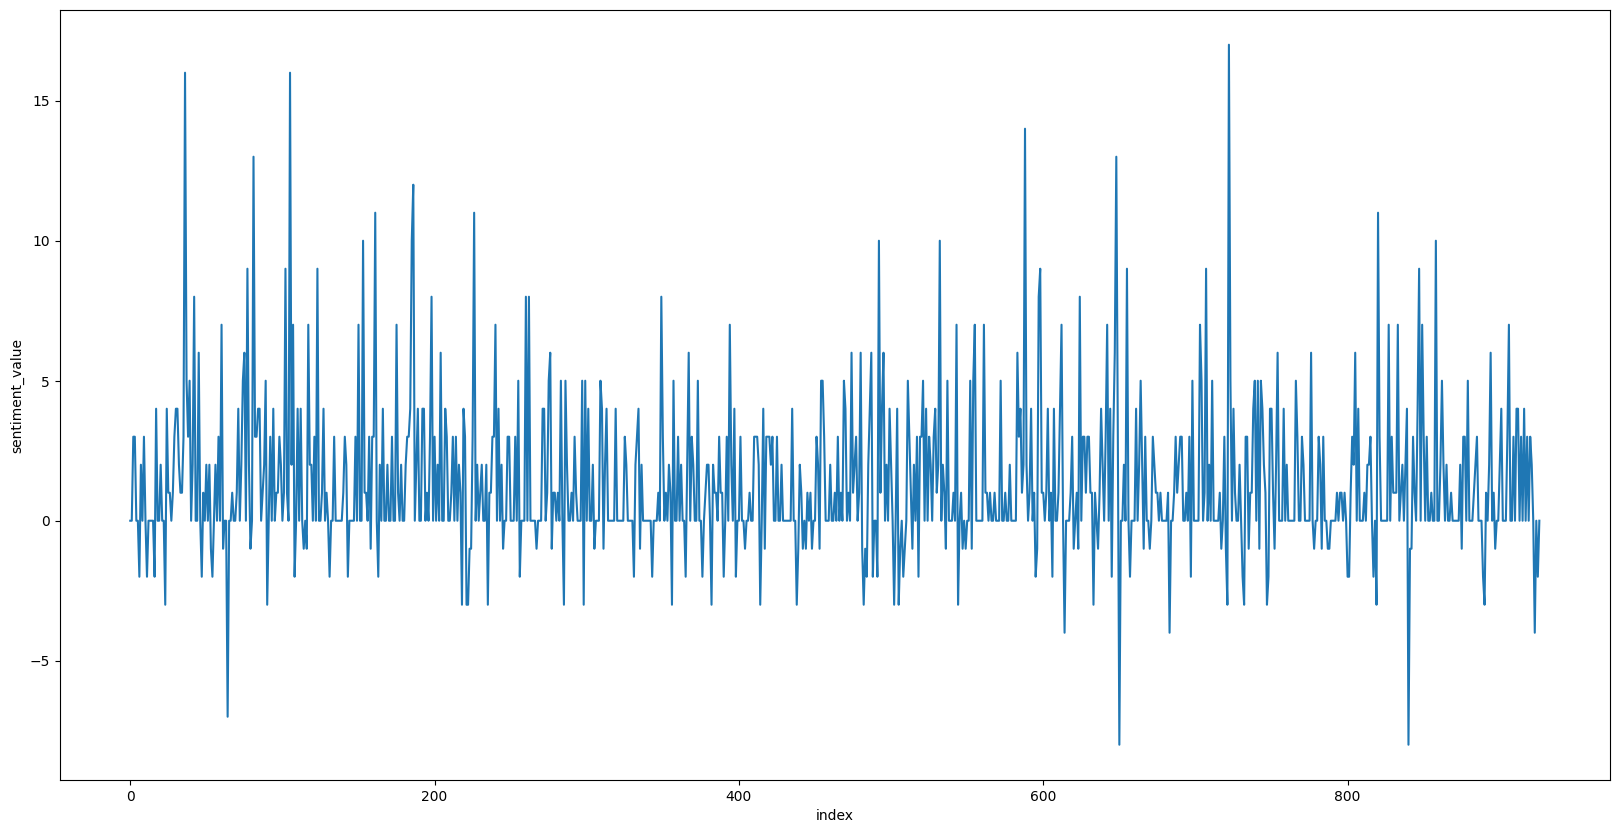

In [78]:
plt.figure(figsize=(20,10))
sns.lineplot(y='sentiment_value', x='index', data=sentences_df)

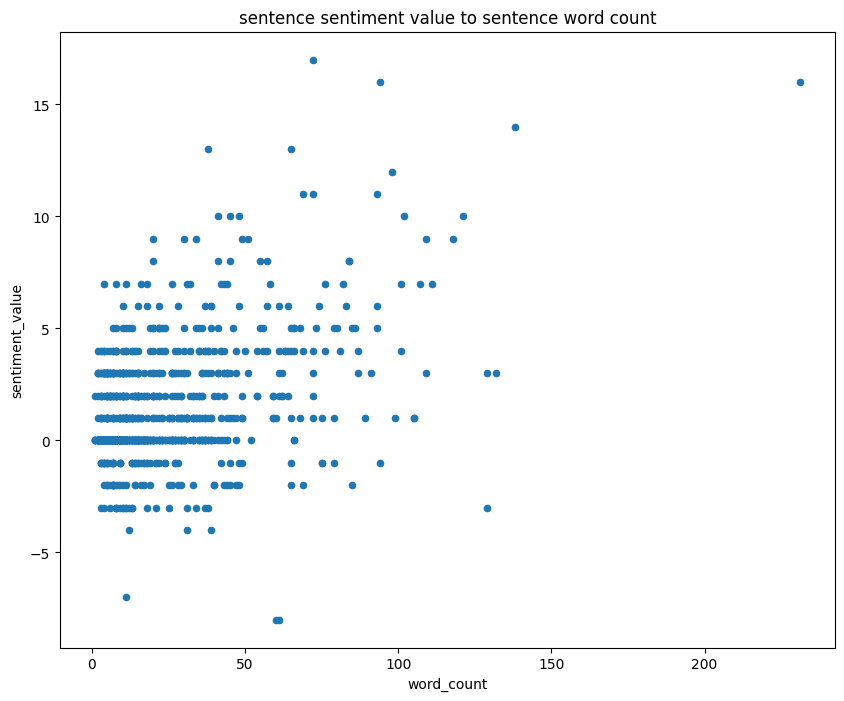

In [79]:
sentences_df.plot.scatter(x = 'word_count',
                     y = 'sentiment_value',
                     figsize=(10,8),
                     title='sentence sentiment value to sentence word count')
plt.show()

In [80]:
from google.colab import files
uploaded=files.upload()

Saving positive-words.txt to positive-words.txt


In [81]:
positive_words = pd.read_csv('positive-words.txt',error_bad_lines=False)
positive_words

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [82]:
from google.colab import files
uploaaded=files.upload()

Saving negative-words.txt to negative-words.txt


In [83]:
negative_words = pd.read_csv('negative-words.txt',encoding='ISO-8859-1',error_bad_lines=False)
negative_words

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [84]:
positive_words.columns

Index([';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;'], dtype='object')

In [90]:
positive_words = positive_words.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;' : 'Words'})

In [85]:
positive_words =  positive_words.iloc[25:]
positive_words.reset_index(inplace=True)
positive_words = positive_words.drop('index', axis=1)
positive_words['Score'] = 1
positive_words

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;,Score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [86]:
negative_words = negative_words.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;' : 'Words'})

In [87]:
negative_words.columns

Index(['Words'], dtype='object')

In [88]:
negative_words =  negative_words.iloc[25:]
negative_words.reset_index(inplace=True)
negative_words = negative_words.drop('index', axis=1)
negative_words['Score'] = -1
negative_words

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [92]:
affinity_scores1 = positive_words.set_index('Words')['Score'].to_dict()
affinity_scores2 = negative_words.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores


{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [93]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
  sent_score = 0
  if text:
    sentence = nlp(text)

    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [94]:
sentences_df['sentiment_value'] = sentences_df['sentence'].apply(calculate_sentiment)
sentences_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11,922
923,"It may never pay out, as the stock cant b ht...",-1,31,923
924,Details Aug 28.,0,3,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,925


In [95]:
sentences_df['word_count'] = sentences_df['sentence'].str.split().apply(len)
sentences_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11,922
923,"It may never pay out, as the stock cant b ht...",-1,31,923
924,Details Aug 28.,0,3,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,925


In [96]:
sentences_df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value,word_count,index
373,@Chad_Hurley @realDonaldTrump @kanyewest Stop ...,5,65,373
722,We just havent observed the https://t.co/mez...,5,72,722
105,@Erdayastronaut @SpaceX Was also thinking that...,6,94,105
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",7,231,36
655,"Its not useful for predicting the future, nor...",9,118,655


In [97]:
sentences_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count,index
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-5,60,650
765,A full blown Starship and SuperHeavy will be h...,-3,36,765
889,This is primarily an electrical/electronic (ch...,-3,69,889
365,4D is essential for dynamically occluded objec...,-3,45,365
158,We couldnt get everything done in https://t....,-3,65,158


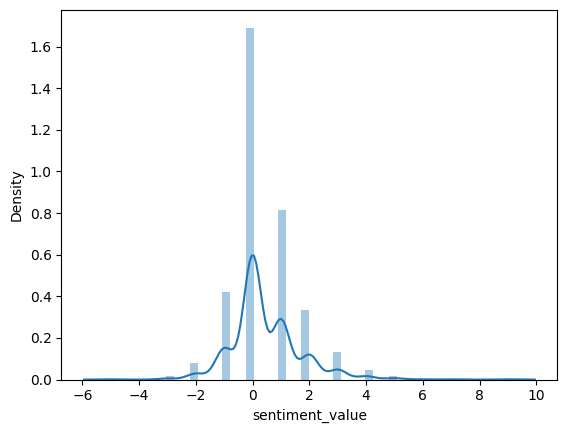

In [98]:
sns.distplot(sentences_df['sentiment_value'])
plt.show()

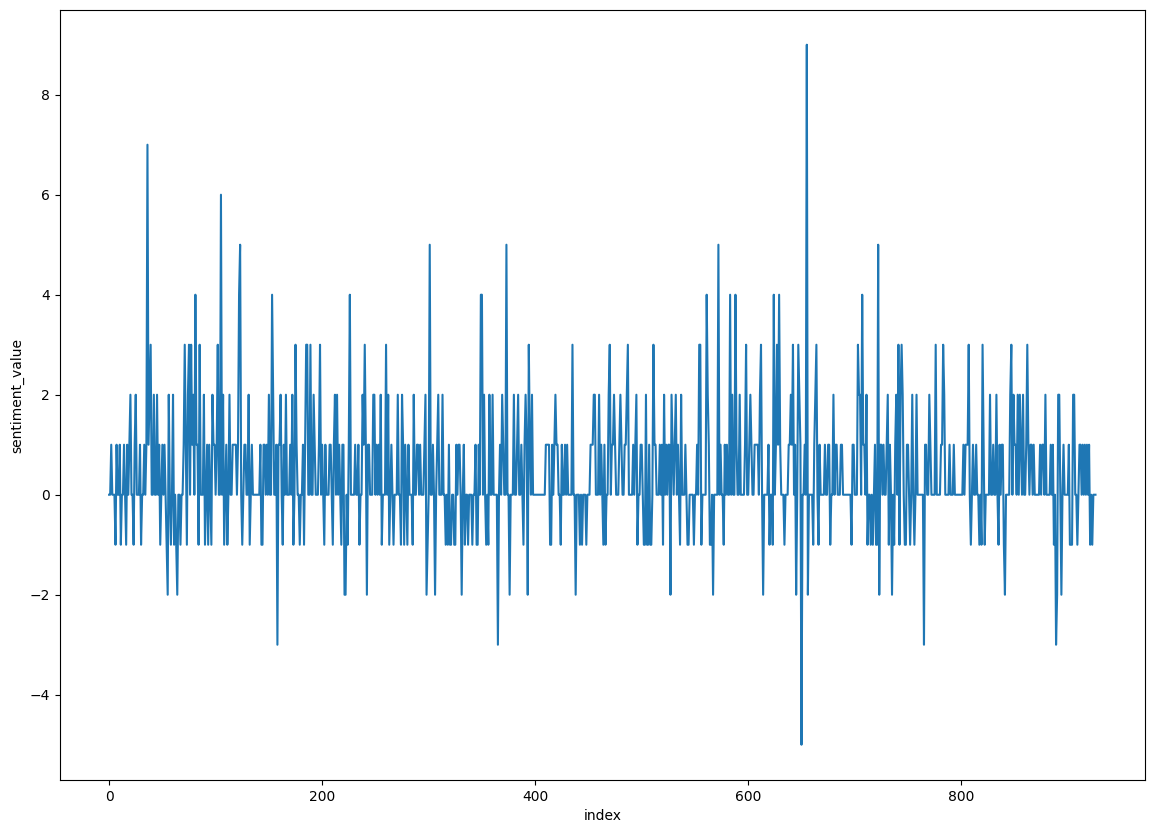

In [99]:
plt.figure(figsize=(14,10))
sns.lineplot(y='sentiment_value', x='index', data=sentences_df)
plt.show()

<Axes: title={'center': 'sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

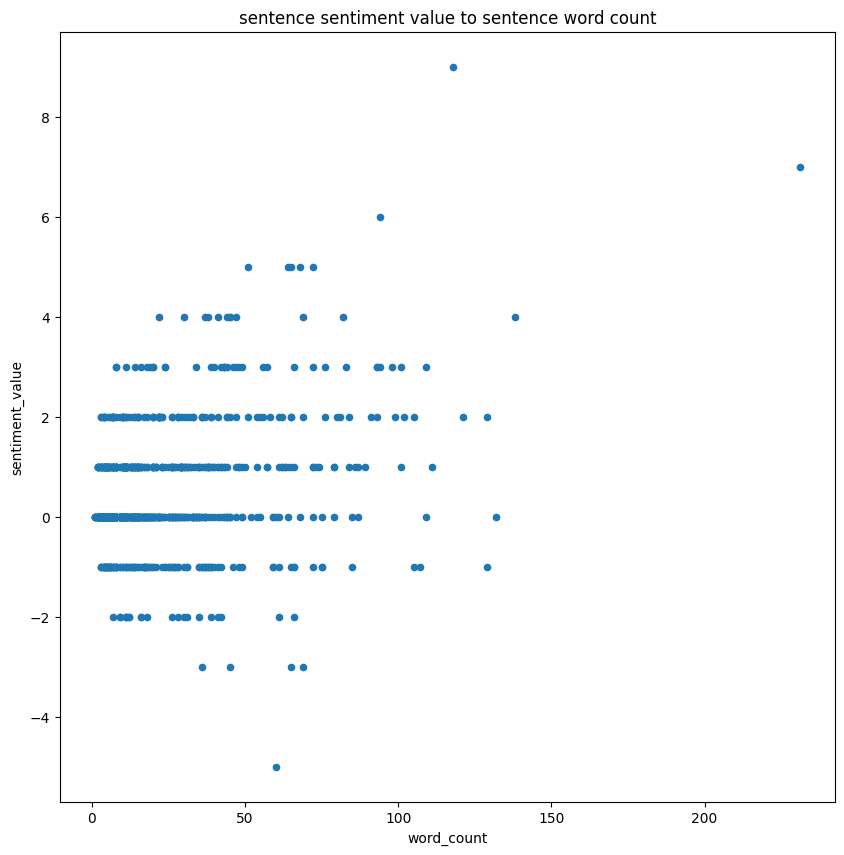

In [100]:
sentences_df.plot.scatter(x='word_count',
                          y='sentiment_value',
                          figsize=(10,10),
                          title='sentence sentiment value to sentence word count')